# 04_MAG_gtdbtk

This document explores the MAG GTDB output. Imported data is the original data files from google drive. This document is written in the Python coding language.

## Load packages and data

In [3]:
import pandas as pd
import os
import sys
import csv
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import glob
import seaborn as sns
from collections import Counter
import matplotlib.pyplot as plt

df = pd.read_csv('/Users/melissaherring/Documents/Bigelow- starting Sept 2022/Virus Project/OMZ_MH_Analysis/Data/mag_data/all_mag_gtdb.csv')

## How many MAGs were classified in total?

In [4]:
total = len(df)
total

631

## How many MAGs were classified to at least that classification level?

In [5]:
# function to count how many were classified based on an input dataframe and taxonomic level

def count_classified(df, level):
    
    level_prefix = level[0] + '__' # create level prefixes
    
    subdf = df[(df[level] != 'Unclassified') & (~df[level].isna()) & (df[level] != '') & (df[level] != level_prefix)] # all conditions that level is unannotated
   
    return len(subdf)  # returns number of rows with annotation for level

In [6]:
level_counts = [] # set up empty level counts string\

levels = ['domain','phyla','class','order','family','genus','species'] # create a levels list

# for loop that counts how many were classified using the count_classified function created above
for level in levels:
    lcount = count_classified(df, level)
    
    print('There are', lcount, 'MAGs annotated to', level,".") 
    
    level_counts.append(lcount)

There are 566 MAGs annotated to domain .
There are 452 MAGs annotated to phyla .
There are 452 MAGs annotated to class .
There are 450 MAGs annotated to order .
There are 441 MAGs annotated to family .
There are 350 MAGs annotated to genus .
There are 216 MAGs annotated to species .


In [7]:
taxdict = {'tax_level': levels, 'num_MAGs_classified': level_counts} # create a dictionary with the number classified for each level

GTDB_tax = pd.DataFrame(data = taxdict)

GTDB_tax['percent_classified'] = GTDB_tax['num_MAGs_classified']/total*100 # add a column to the dataframe that is the percent of MAGs

GTDB_tax

,tax_level,num_MAGs_classified,percent_classified
0,domain,566,89.698891
1,phyla,452,71.632330
2,class,452,71.632330
3,order,450,71.315372
4,family,441,69.889065
5,genus,350,55.467512
6,species,216,34.231379


Text(0.5, 1.0, 'Percent of MAGs Classified with GTDB')

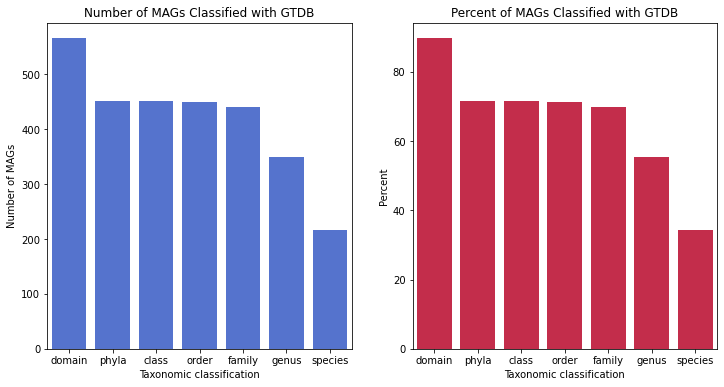

In [77]:
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(12, 6))

sns.barplot(x = 'tax_level', y= 'num_MAGs_classified', data = GTDB_tax, color= 'royalblue', ax = axes[0])
axes[0].set_xlabel('Taxonomic classification')
axes[0].set_ylabel('Number of MAGs')
axes[0].set_title('Number of MAGs Classified with GTDB')

sns.barplot(x = 'tax_level', y= 'percent_classified', data = GTDB_tax, color = 'crimson', ax = axes[1])
axes[1].set_xlabel('Taxonomic classification')
axes[1].set_ylabel('Percent')
axes[1].set_title('Percent of MAGs Classified with GTDB')

## What are the most common classifications?

In [ ]:
Counter(df['classification']).most_common()[:10]

In [ ]:
# top 5 groups in each level
for taxa in ['domain', 'phyla','class','order','family','genus','species']:
    print(df.groupby(taxa)['user_genome'].count().sort_values(ascending=False)[:5])
    print("\n")

In [61]:
phyla_df = df.groupby('phyla', as_index=False)['user_genome'].count().sort_values(by = 'user_genome',ascending=False)
top_phyla = phyla_df [:10]

class_df = df.groupby('class', as_index=False)['user_genome'].count().sort_values(by = 'user_genome',ascending=False)
top_class = class_df [:10]

order_df = df.groupby('order', as_index=False)['user_genome'].count().sort_values(by = 'user_genome',ascending=False)
top_order = order_df [:10]

Text(0.5, 1.0, 'Top 10 Most Abundant Orders')

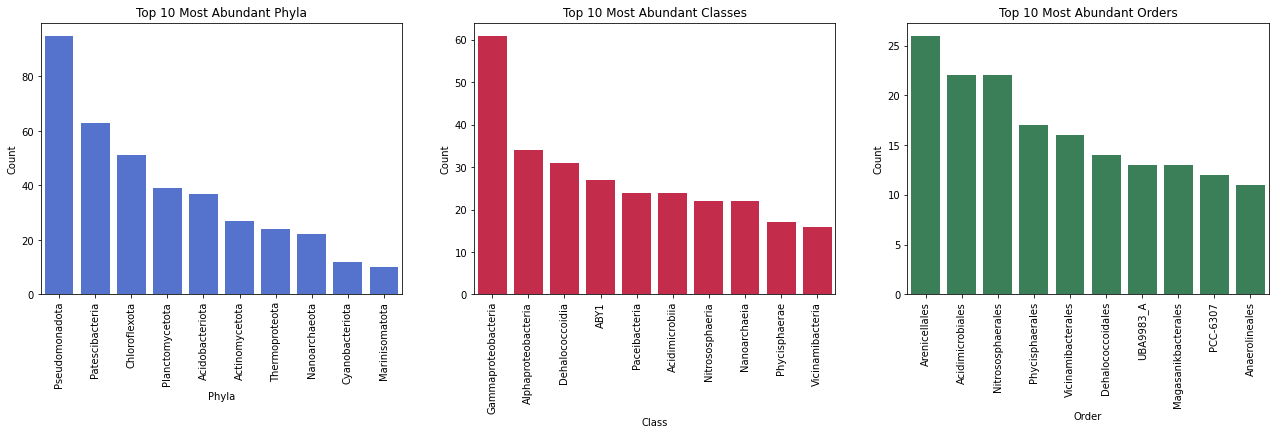

In [81]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(22, 5))

for ax in axes:
    ax.tick_params(axis='x', rotation=90)

sns.barplot(x = 'phyla', y= 'user_genome', data = top_phyla, color = 'royalblue', ax = axes[0])
axes[0].set_xlabel('Phyla')
axes[0].set_ylabel('Count')
axes[0].set_title('Top 10 Most Abundant Phyla')

sns.barplot(x = 'class', y= 'user_genome', data = top_class, color = 'crimson', ax = axes[1])
axes[1].set_xlabel('Class')
axes[1].set_ylabel('Count')
axes[1].set_title('Top 10 Most Abundant Classes')

sns.barplot(x = 'order', y= 'user_genome', data = top_order, color = 'seagreen', ax = axes[2])
axes[2].set_xlabel('Order')
axes[2].set_ylabel('Count')
axes[2].set_title('Top 10 Most Abundant Orders')


## Plot tax level

In [82]:
top_10_class = list(df.groupby('class', as_index = False)['user_genome'].count().sort_values(by = 'user_genome', ascending = False)[:10]['class'])
top_10_class 

['Gammaproteobacteria',
 'Alphaproteobacteria',
 'Dehalococcoidia',
 'ABY1',
 'Paceibacteria',
 'Acidimicrobiia',
 'Nitrososphaeria',
 'Nanoarchaeia',
 'Phycisphaerae',
 'Vicinamibacteria']

In [83]:
plot_class = []

for item in df['class']:
    if item in top_10_class:
        plot_class.append(item)
    else:
        plot_class.append('Other')

df['plot_class'] = plot_class

In [ ]:
# alternative: list comprehension solution
# df['plot_class'] = [item if item in top_10_class else 'Other' for item in df['plot_class']]

Text(0.5, 1.0, 'Count')

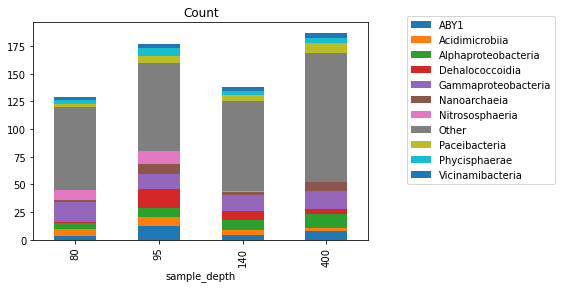

In [87]:
class_counts = df.groupby(['sample_depth', 'plot_class'], as_index = False)['user_genome'].count().pivot(columns = 'plot_class', index = 'sample_depth', values = 'user_genome')

class_counts.plot.bar(stacked = True)
plt.legend(bbox_to_anchor=(1.1, 1.05))
plt.title('Count')

In [ ]:
class_counts

Text(0.5, 1.0, 'Percent')

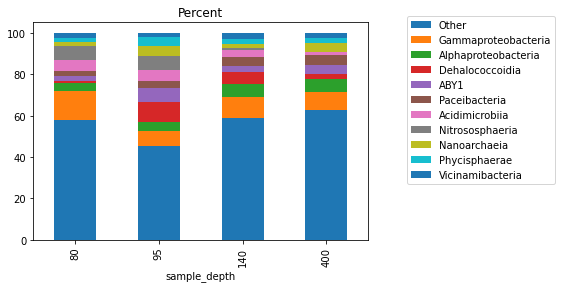

In [86]:
column_order = ['Other'] + top_10_class

class_pcts = class_counts.div(class_counts.sum(axis=1), axis=0)
class_pcts = round(class_pcts * 100, 1)



class_pcts[column_order].plot.bar(stacked = True)
plt.legend(bbox_to_anchor=(1.1, 1.05))
plt.title('Percent')

In [ ]:
class_pcts